In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
# standard imports
import pandas as pd

# data loading
import sys
sys.path.append('../')
import bread.data, bread.data.graph, bread.vis
from glob import glob

# visualizing
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# utility
from tqdm.notebook import tqdm

# Cell graph building

In [9]:
img_seg = bread.data.load_npz('../data/segmentations/colony007/100.npz')
img_vis = bread.data.load_npz('../data/microscopy_PhC/colony007/100.npz')

data, df_x, df_e = bread.data.graph.build_cellgraph(img_seg, max_membdist=12, return_df=True)

In [10]:
pd.DataFrame(data.x, dtype=float)

,0,1,2
0,4123.5,36.370827,0.397671
1,5199.0,40.748756,0.451332
2,1953.0,25.059181,0.558208
3,2138.5,26.250004,0.620104
4,3062.0,31.278170,0.144420
5,2019.5,25.441195,0.410524
6,3471.5,33.416870,0.343562
7,1982.0,25.271772,0.376856
8,1488.5,21.922918,0.203298
9,1237.0,19.922813,0.473862


In [11]:
pd.DataFrame(data.edge_attr, dtype=float)

,0,1,2
0,82.904549,-2.284549,2.828427
1,58.771404,1.753255,2.000000
2,61.472282,0.117374,2.236068
3,66.115593,0.924599,2.828427
4,67.240700,-1.349687,2.236068
5,56.763657,2.632945,2.236068
6,67.773560,-2.865859,2.828427
7,69.084625,-0.042501,2.000000
8,50.723869,-0.098942,2.828427
9,49.228291,-2.482378,2.236068


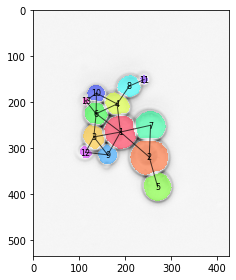

In [14]:
plt.close('all')
figax = bread.vis.plot_visible(img_vis)
figax = bread.vis.plot_seg(img_seg, figax=figax, alpha=0.5)
figax = bread.vis.plot_graph(img_seg, df_e.loc[:, ['cell_id1', 'cell_id2']].to_numpy(), figax=figax)
plt.show(figax[0])

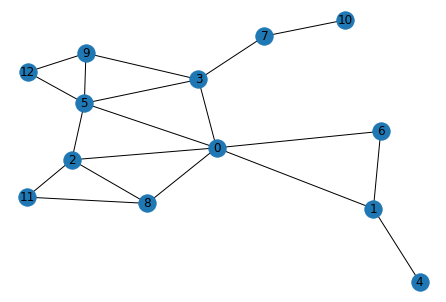

In [16]:
# Verify that we indeed have made no mistake when storing the graph
import bread.vis.graph

plt.close('all')
bread.vis.graph.plot_graph_networkx(
	data,
	pos=bread.utils.get_cms(img_seg)[:, [1, 0]],
	with_labels=True
)
plt.gca().invert_yaxis()
plt.show()

# Saving the dataset

In [18]:
colony_ids = (0, 1, 2, 3, 7)

for colony_id in tqdm(colony_ids, desc='colony'):
	# Load the segmentation for one colony
	imgs_seg = bread.data.load_npz(sorted(glob('../data/segmentations/colony{:03d}/*.npz'.format(colony_id))))
	for time_id, img_seg in enumerate(tqdm(imgs_seg, desc='frame')):
		# Build the graph
		data = bread.data.graph.build_cellgraph(img_seg, max_membdist=12)

		# Save to disk
		bread.data.dump_npz('data/cellgraphs/colony{:03d}/{:03d}.npz'.format(colony_id, time_id), data.to_dict(), force=True)

colony:   0%|          | 0/5 [00:00<?, ?it/s]

frame:   0%|          | 0/180 [00:00<?, ?it/s]

frame:   0%|          | 0/180 [00:00<?, ?it/s]

frame:   0%|          | 0/180 [00:00<?, ?it/s]

frame:   0%|          | 0/180 [00:00<?, ?it/s]

frame:   0%|          | 0/180 [00:00<?, ?it/s]

# Loading data saved to disk

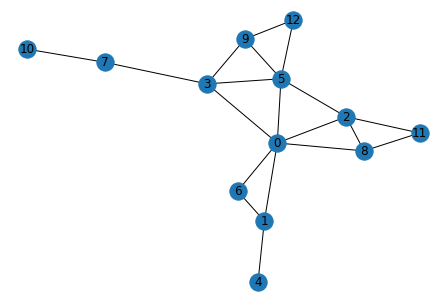

In [20]:
data = bread.data.graph.from_npz(bread.data.load_npz('data/cellgraphs/colony007/100.npz'))
plt.close('all')
bread.vis.graph.plot_graph_networkx(data, with_labels=True)
plt.show()

In [22]:
import numpy as np

In [23]:
pd.DataFrame(np.array(data.x), columns=['A', 'r', 'e'])

,A,r,e
0,4123.5,36.370827,0.397671
1,5199.0,40.748756,0.451332
2,1953.0,25.059181,0.558208
3,2138.5,26.250004,0.620104
4,3062.0,31.278170,0.144420
5,2019.5,25.441195,0.410524
6,3471.5,33.416870,0.343562
7,1982.0,25.271772,0.376856
8,1488.5,21.922918,0.203298
9,1237.0,19.922813,0.473862


In [24]:
pd.DataFrame(np.array(data.edge_attr), columns=['rho', 'theta', 'l'])

,rho,theta,l
0,82.904549,-2.284549,2.828427
1,58.771404,1.753255,2.000000
2,61.472282,0.117374,2.236068
3,66.115593,0.924599,2.828427
4,67.240700,-1.349687,2.236068
5,56.763657,2.632945,2.236068
6,67.773560,-2.865859,2.828427
7,69.084625,-0.042501,2.000000
8,50.723869,-0.098942,2.828427
9,49.228291,-2.482378,2.236068
